<a href="https://colab.research.google.com/github/vectronxel/hacktoberfest-git-session/blob/main/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/TrafficIndex_19Jun2022-26Jun2022.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('/TrafficIndex_19Jun2022-26Jun2022.csv')

In [11]:
df.head()

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50


In [12]:
from geopy.geocoders import Nominatim
 
geolocator = Nominatim(user_agent="test")
 
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['City'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [13]:
df

,Rank,City,AverageTCI,MaxTCI,location,point
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)"
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)"
2,3,Mumbai,38.37,153.41,"(Mumbai, Mumbai Metropolitan Region, Mumbai Su...","(19.0785451, 72.878176, 0.0)"
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)"
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.5073219, -0.1276474, 0.0)"
...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)"
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)"
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)"
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)"


In [14]:


df['latitude']=df['point'].str[0]
df['longitude']=df['point'].str[1]



In [15]:
df

,Rank,City,AverageTCI,MaxTCI,location,point,latitude,longitude
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)",6.455057,3.394179
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)",56.949398,24.105185
2,3,Mumbai,38.37,153.41,"(Mumbai, Mumbai Metropolitan Region, Mumbai Su...","(19.0785451, 72.878176, 0.0)",19.078545,72.878176
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)",35.689252,51.389600
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.5073219, -0.1276474, 0.0)",51.507322,-0.127647
...,...,...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)",1.357107,103.819499
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)",45.067755,7.682489
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)",39.469707,-0.376335


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        68 non-null     int64  
 1   City        68 non-null     object 
 2   AverageTCI  68 non-null     float64
 3   MaxTCI      68 non-null     float64
 4   location    68 non-null     object 
 5   point       68 non-null     object 
 6   latitude    68 non-null     float64
 7   longitude   68 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.4+ KB


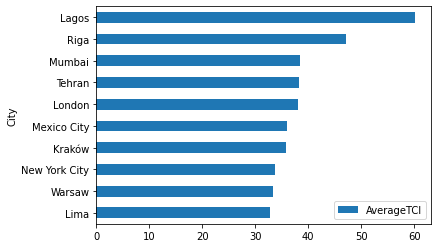

In [17]:
df.sort_values(by="AverageTCI",ascending=True).tail(10).plot.barh(x='City',y='AverageTCI')

In [18]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',hover_name='City',hover_data=['AverageTCI'],color='AverageTCI',
    size="AverageTCI",size_max=20,opacity=0.4,
    center={'lat':50, 'lon':9},
    zoom=1,
    height=700,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="City Map for Average TCI")
fig.show()